In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [7]:
univ=pd.read_csv('C:/Users/Computer/Downloads/Universities.csv')
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [8]:
univ2=univ.iloc[:,1:]
univ2

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [9]:
 # Normalize heterogenous numerical data using standard scalar fit transform to dataset
univ_norm=pd.DataFrame(normalize(univ2),columns=univ2.columns)
univ_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.057602,0.003913,0.000967,0.000572,0.998323,0.004133
1,0.022252,0.001573,0.000393,0.000094,0.999750,0.001274
2,0.050283,0.002474,0.002355,0.000359,0.998725,0.002873
3,0.041538,0.002410,0.000761,0.000381,0.999130,0.002790
4,0.058443,0.003790,0.001507,0.000594,0.998274,0.004109
5,0.041628,0.002765,0.000715,0.000311,0.999125,0.002951
6,0.041597,0.002847,0.000949,0.000380,0.999125,0.003005
7,0.062235,0.003670,0.001190,0.000595,0.998043,0.004562
8,0.035398,0.002301,0.000354,0.000278,0.999368,0.002453
9,0.022230,0.001278,0.000750,0.000119,0.999751,0.001482


In [10]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

In [11]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)  
    kmeans.fit(univ_norm)
    wcss.append(kmeans.inertia_)

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


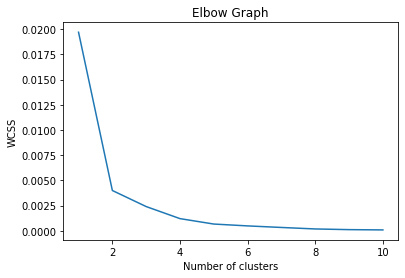

In [12]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build Cluster Algorithm Using k=4

In [13]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=42).fit(univ_norm)
clusters4

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters4.labels_

array([2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 1, 2, 1, 0, 1, 3, 0, 3, 2,
       3, 3, 0])

In [15]:
# Assign clusters to the data set
univ4=univ.copy()
univ4['clusters4id']=clusters4.labels_
univ4

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters4id
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [16]:
# Compute the centroids for K=4 clusters with 6 variables
clusters4.cluster_centers_

array([[3.46646918e-02, 2.24687473e-03, 7.06752500e-04, 2.76919972e-04,
        9.99368329e-01, 2.35828706e-03],
       [1.12757732e-01, 4.12201708e-03, 7.59230756e-03, 2.23017002e-03,
        9.93524025e-01, 7.67108453e-03],
       [5.22104146e-02, 3.25463035e-03, 1.31079644e-03, 4.53485821e-04,
        9.98601114e-01, 3.60725405e-03],
       [8.45769889e-02, 4.97680644e-03, 3.77213808e-03, 1.06221659e-03,
        9.96360145e-01, 5.92662638e-03]])

In [17]:
# Group data by Clusters (K=4)
univ4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1349.000000,87.500000,27.900000,10.400000,41026.200000,91.000000
1,1,1053.666667,38.333333,70.333333,20.666667,9318.333333,72.000000
2,2,1289.285714,80.571429,32.428571,11.000000,25077.857143,88.857143
3,3,1197.000000,71.600000,52.600000,15.000000,14187.600000,84.000000


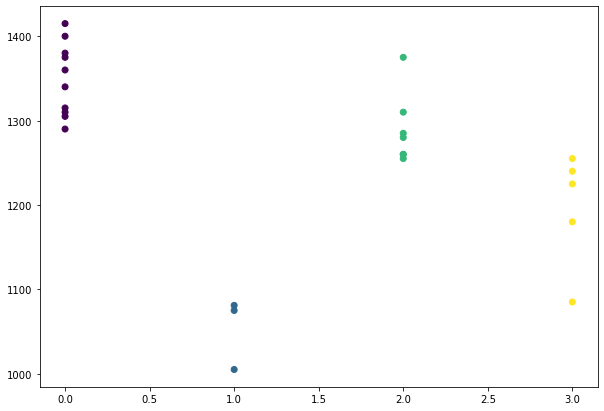

In [18]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ4['clusters4id'],univ4['SAT'], c=clusters4.labels_)

Build clusters using k = 3

In [20]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=42).fit(univ_norm)
clusters3

KMeans(n_clusters=3, random_state=42)

In [21]:
clusters3.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 2, 0])

In [22]:
# Assign clusters to the data set
univ3=univ.copy()
univ3['clusters3id']=clusters3.labels_
univ3

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters3id
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [23]:
# Compute the centroids for K=3 clusters with 6 variables
clusters3.cluster_centers_

array([[4.06177922e-02, 2.59884486e-03, 9.40809119e-04, 3.34282712e-04,
        9.99115477e-01, 2.76696196e-03],
       [1.12757732e-01, 4.12201708e-03, 7.59230756e-03, 2.23017002e-03,
        9.93524025e-01, 7.67108453e-03],
       [8.08533483e-02, 4.75894571e-03, 3.34180743e-03, 9.84360002e-04,
        9.96640697e-01, 5.69923160e-03]])

In [24]:
# Group data by Clusters (K=3)
univ3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1328.750000,85.312500,30.125000,10.562500,35355.062500,90.000000
1,1,1053.666667,38.333333,70.333333,20.666667,9318.333333,72.000000
2,2,1206.666667,72.000000,47.833333,14.500000,15177.333333,85.333333


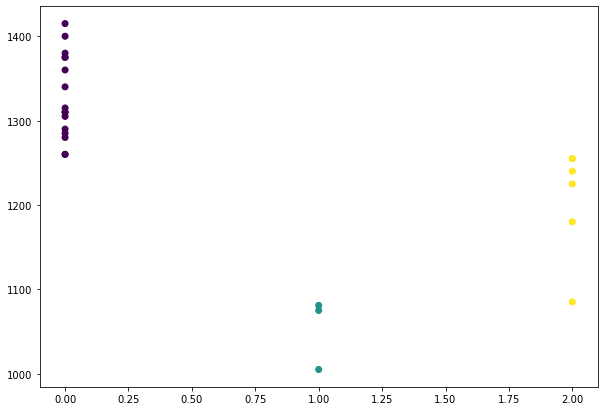

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(univ3['clusters3id'],univ3['SAT'], c=clusters3.labels_) 